In [117]:
# Carga de librerias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
from sklearn import datasets
%matplotlib inline
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
import joblib

In [118]:
url = "https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv"
df = pd.read_csv(url)

In [119]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [120]:
# Verificar dimension
df.shape

(918, 12)

In [121]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [122]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

In [123]:
# Informacion del tipo de dato de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No se encontraron datos nulos

In [124]:
columnas_numericas = [
    "Age",
    "RestingBP",
    "Cholesterol",
    "MaxHR",
    "Oldpeak"
]

columnas_categoricas = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "FastingBS",
    "ExerciseAngina",
    "ST_Slope"
]

columna_objetivo = "HeartDisease"

In [125]:
# Cantidad de nulos por columnas
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [126]:
print(df[columnas_numericas].describe())

              Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564  136.809368    0.887364
std      9.432617   18.514154   109.384145   25.460334    1.066570
min     28.000000    0.000000     0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000  120.000000    0.000000
50%     54.000000  130.000000   223.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000


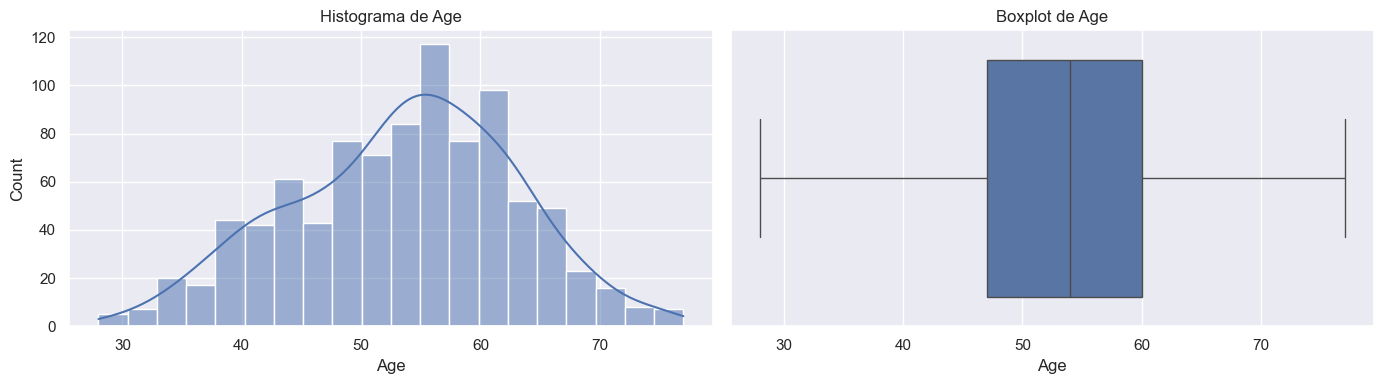

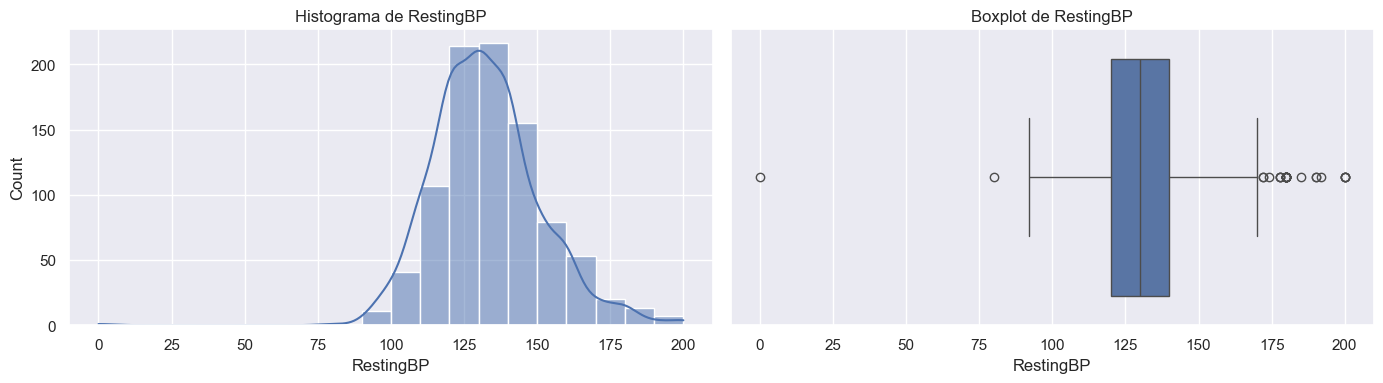

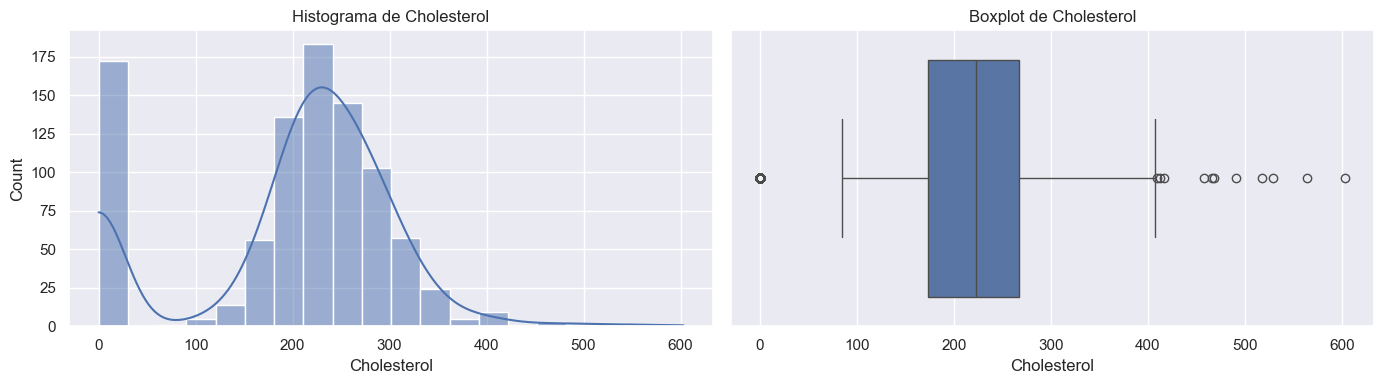

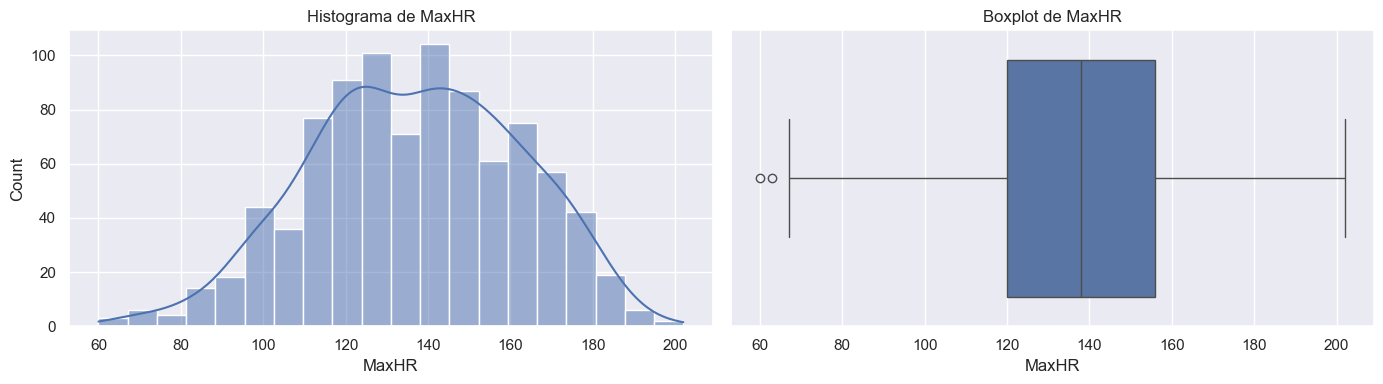

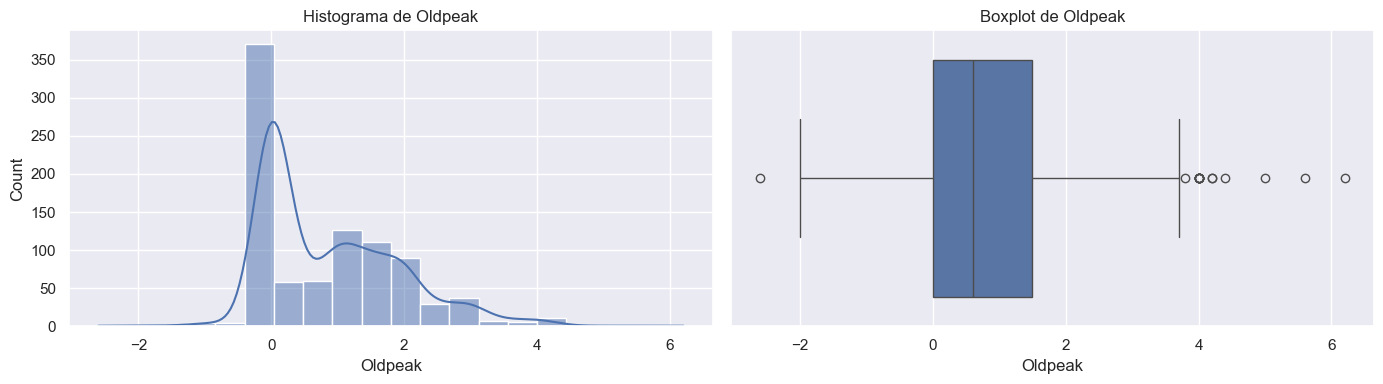

In [127]:
for col in columnas_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma
    sns.histplot(df[col], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

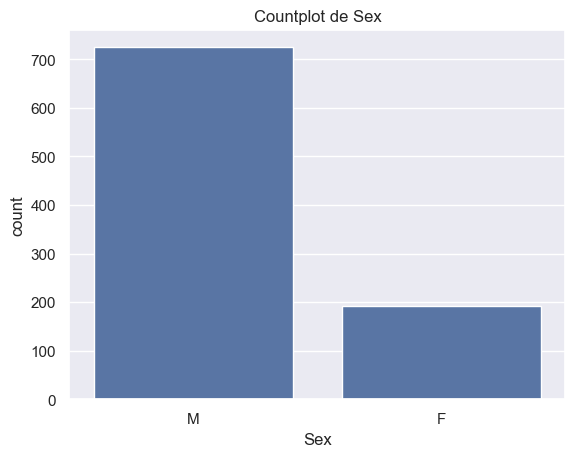

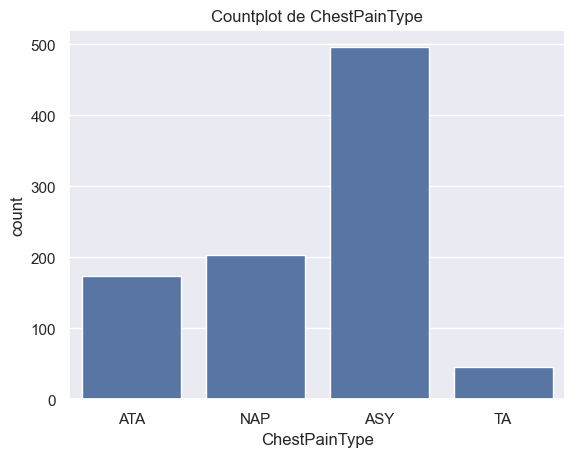

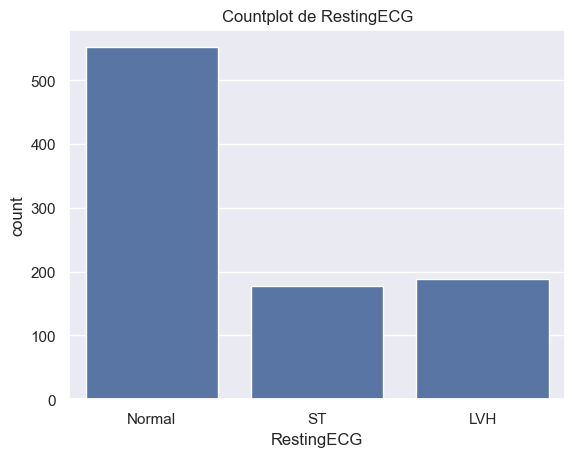

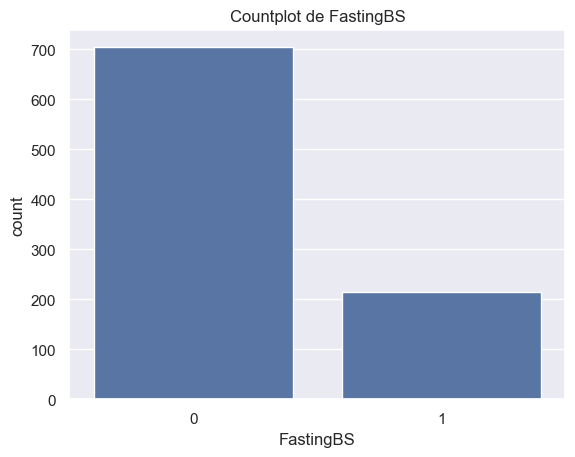

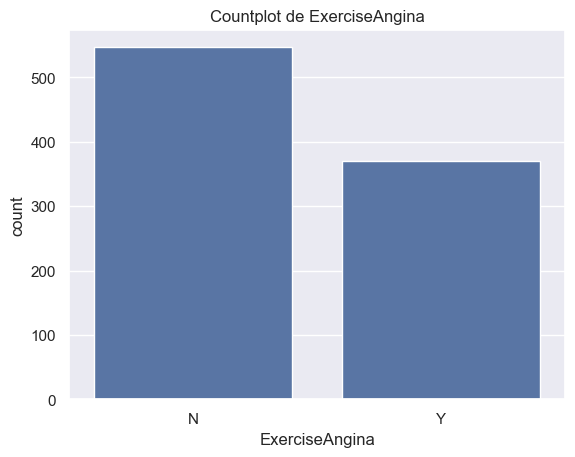

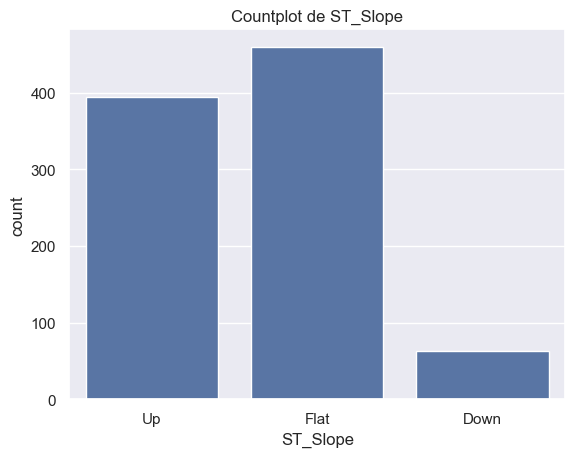

In [128]:
for col in columnas_categoricas:
    sns.countplot(x=df[col])
    plt.title(f"Countplot de {col}")
    plt.show()

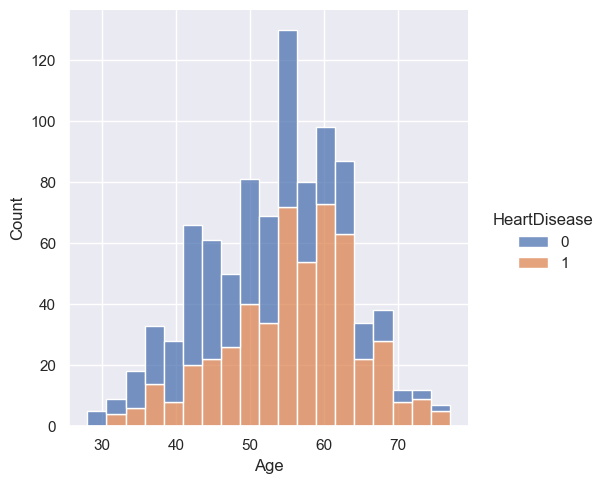

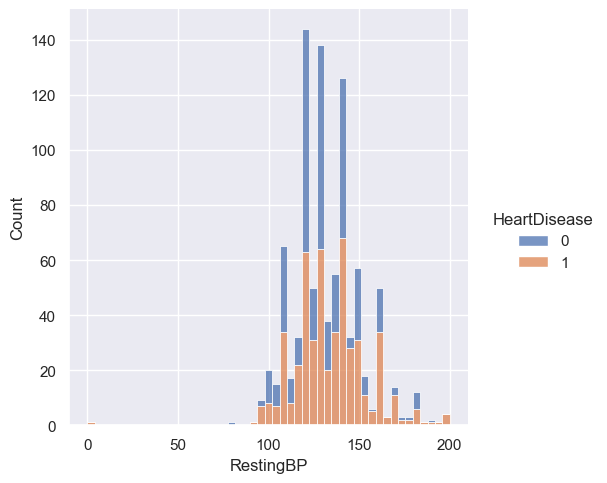

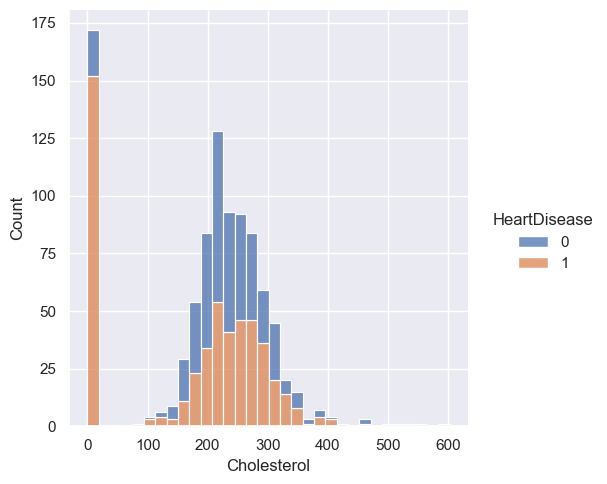

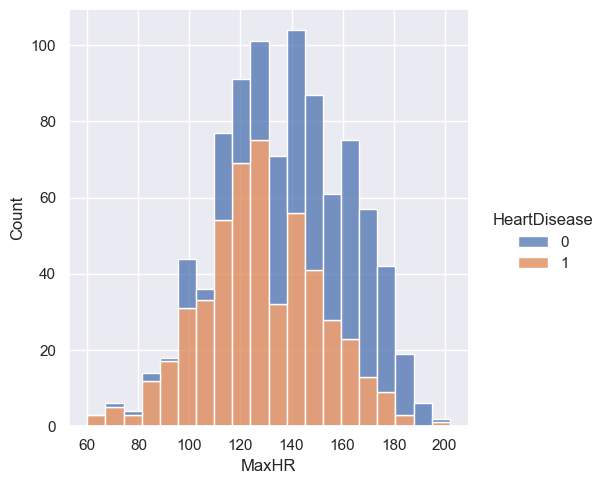

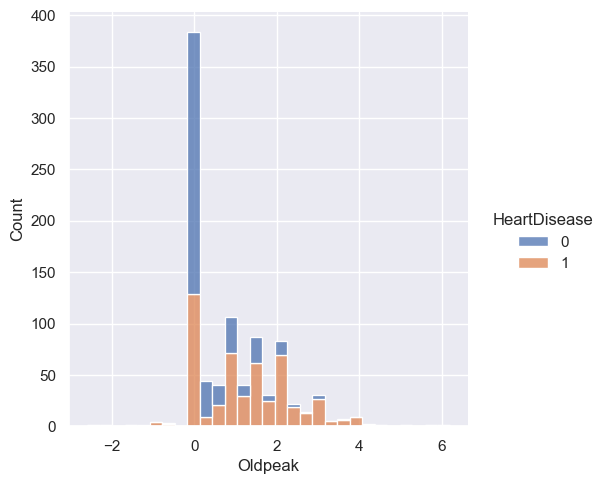

In [129]:
for col in columnas_numericas:
  sns.displot(data=df, x=col, hue="HeartDisease", multiple="stack")

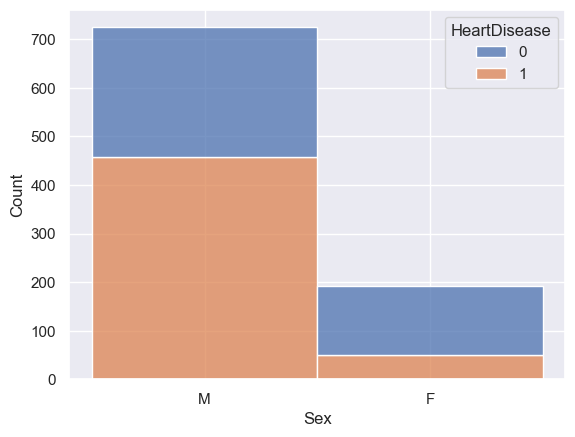

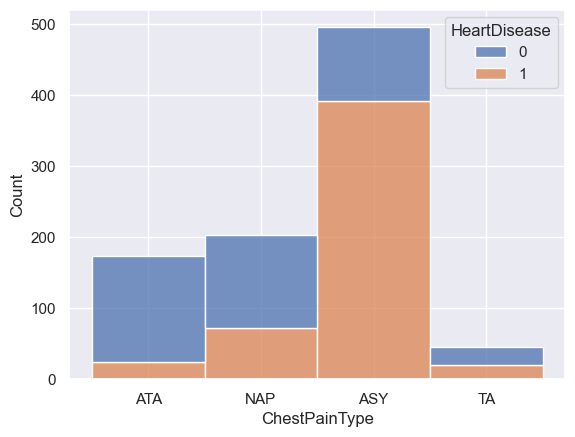

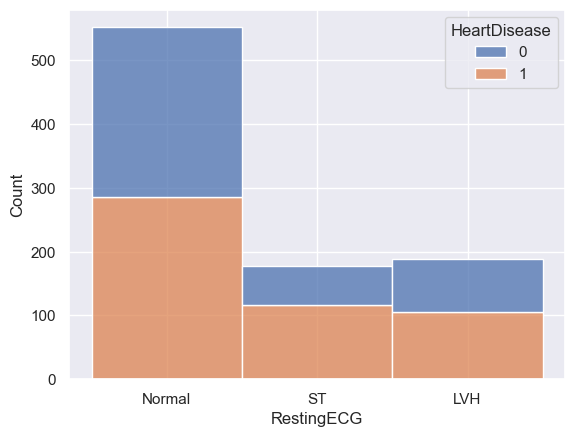

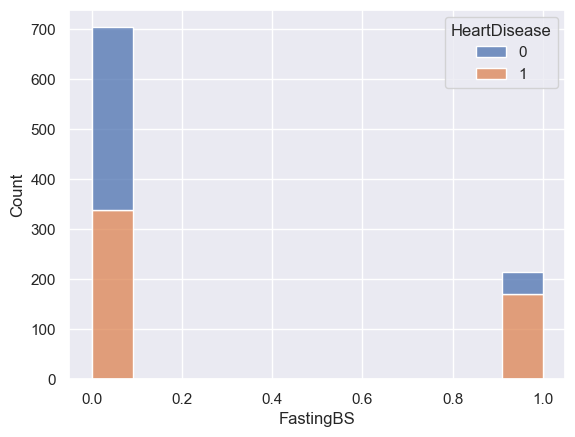

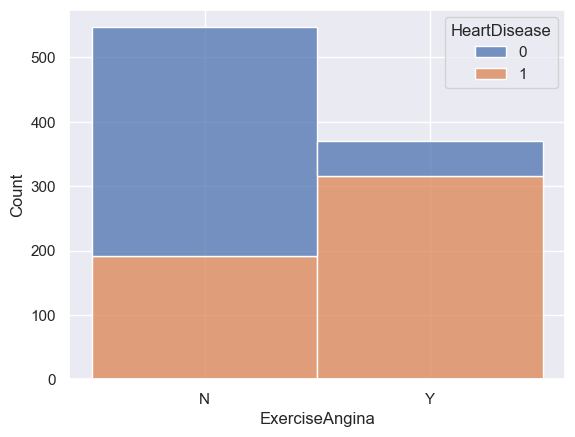

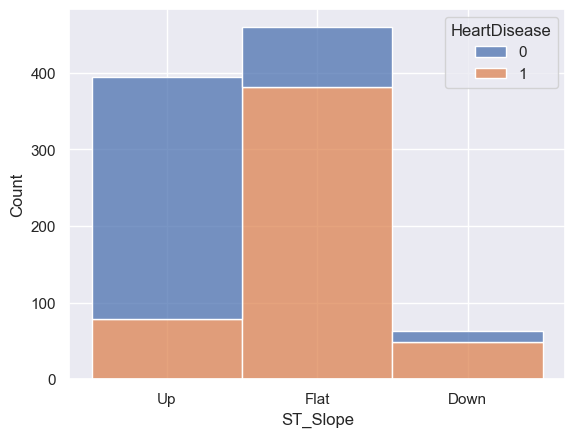

In [130]:
# Crear las gráficas
for col in columnas_categoricas:
    sns.histplot(data=df, x=col, hue="HeartDisease", multiple="stack")
    plt.show()

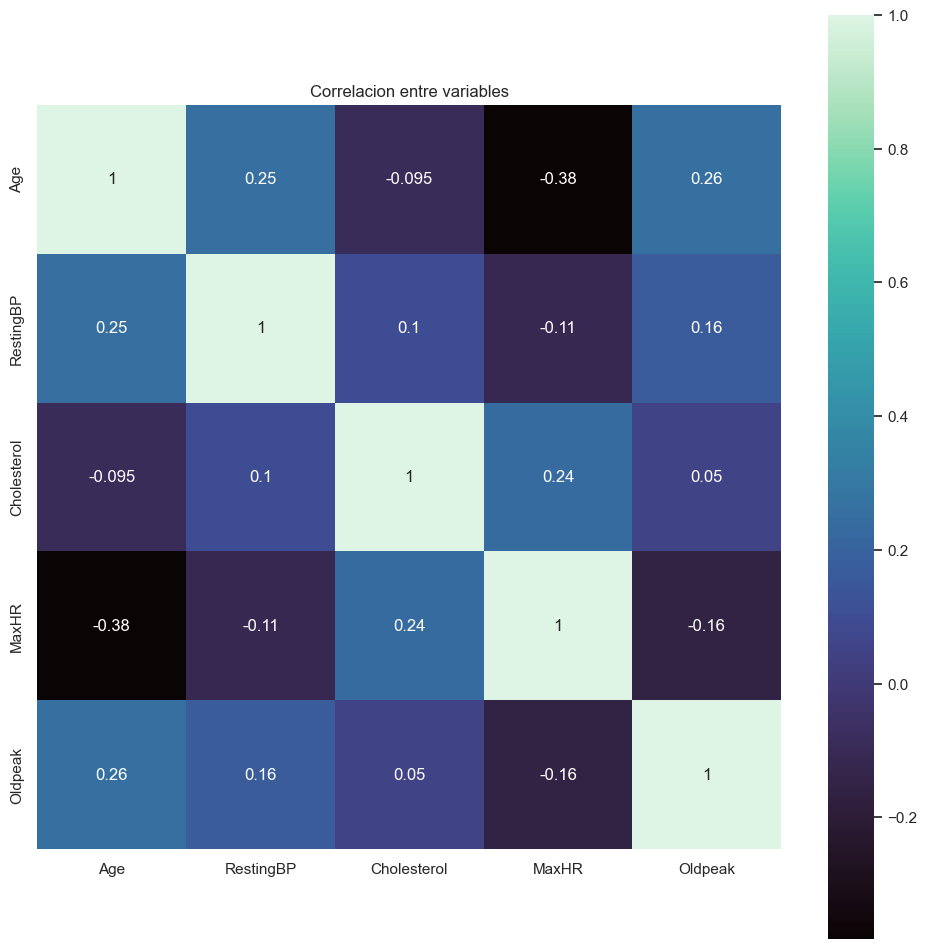

In [131]:
# COMPLETAR
corr_matrix = df[columnas_numericas].corr()
plt.figure(figsize=(12,12))
ax=sns.heatmap(corr_matrix, vmax=1,square=True, annot=True, cmap='mako')
plt.title('Correlacion entre variables')
plt.show()

In [132]:
print((df["Cholesterol"] == 0).sum())
print(((df["Cholesterol"] == 0).sum() / len(df)) * 100)
print((df["RestingBP"] == 0).sum())
print(((df["RestingBP"] == 0).sum() / len(df)) * 100)

172
18.736383442265794
1
0.10893246187363835


In [133]:

# 1. Imputar la media en Cholesterol (excluyendo los ceros para calcular la media real)
chol_mean = df.loc[df["Cholesterol"] != 0, "Cholesterol"].median()
df.loc[df["Cholesterol"] == 0, "Cholesterol"] = chol_mean

# 2. Eliminar el registro donde RestingBP = 0
df = df.drop(df[df["RestingBP"] == 0].index)

In [134]:
print((df["Cholesterol"] == 0).sum())
print(((df["Cholesterol"] == 0).sum() / len(df)) * 100)
print((df["RestingBP"] == 0).sum())
print(((df["RestingBP"] == 0).sum() / len(df)) * 100)

0
0.0
0
0.0


In [135]:
df.shape

(917, 12)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.1+ KB


In [137]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [138]:
cols_label_enc = ['ExerciseAngina','ST_Slope', 'Sex'] # Si son jerarquicos o binarios
cols_one_hot = ['ChestPainType', 'RestingECG'] # No son jerarquicos

In [139]:
data_encoded = df.copy()

In [140]:
from sklearn.preprocessing import LabelEncoder

encoders = {}  # aquí guardamos el encoder de cada columna

for c in cols_label_enc:
    print(f"\nColumna: {c}")
    le = LabelEncoder()
    le.fit(data_encoded[c])
    data_encoded[c] = le.transform(data_encoded[c])
    encoders[c] = le  # lo guardamos para después
    
    # Mostrar correspondencia
    for idx, clase in enumerate(le.classes_):
        print(f"{clase} → {idx}")



Columna: ExerciseAngina
N → 0
Y → 1

Columna: ST_Slope
Down → 0
Flat → 1
Up → 2

Columna: Sex
F → 0
M → 1


In [141]:
from sklearn.preprocessing import OneHotEncoder

# Crear un objeto OneHotEncoder
oh_encoder = OneHotEncoder(drop='first')

# Aplicar OneHotEncoding a las columnas especificadas
encoded_features = oh_encoder.fit_transform(data_encoded[cols_one_hot])

# Convertir las características codificadas en un DataFrame
encoded_df = pd.DataFrame(
    encoded_features.toarray(),
    columns=oh_encoder.get_feature_names_out(cols_one_hot),
    index=data_encoded.index   # 👈 aquí está la clave
)

In [142]:
# Concatenar el DataFrame codificado con el DataFrame original
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Eliminar las columnas originales que ya han sido codificadas
data_encoded.drop(cols_one_hot, axis=1, inplace=True)

In [143]:
data_encoded

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2,0,1.0,0.0,0.0,1.0,0.0
1,49,0,160,180,0,156,0,1.0,1,1,0.0,1.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0,0.0,2,0,1.0,0.0,0.0,0.0,1.0
3,48,0,138,214,0,108,1,1.5,1,1,0.0,0.0,0.0,1.0,0.0
4,54,1,150,195,0,122,0,0.0,2,0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,1,0.0,0.0,1.0,1.0,0.0
914,68,1,144,193,1,141,0,3.4,1,1,0.0,0.0,0.0,1.0,0.0
915,57,1,130,131,0,115,1,1.2,1,1,0.0,0.0,0.0,1.0,0.0
916,57,0,130,236,0,174,0,0.0,1,1,1.0,0.0,0.0,0.0,0.0


In [144]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   Sex                917 non-null    int32  
 2   RestingBP          917 non-null    int64  
 3   Cholesterol        917 non-null    int64  
 4   FastingBS          917 non-null    int64  
 5   MaxHR              917 non-null    int64  
 6   ExerciseAngina     917 non-null    int32  
 7   Oldpeak            917 non-null    float64
 8   ST_Slope           917 non-null    int32  
 9   HeartDisease       917 non-null    int64  
 10  ChestPainType_ATA  917 non-null    float64
 11  ChestPainType_NAP  917 non-null    float64
 12  ChestPainType_TA   917 non-null    float64
 13  RestingECG_Normal  917 non-null    float64
 14  RestingECG_ST      917 non-null    float64
dtypes: float64(6), int32(3), int64(6)
memory usage: 103.9 KB


In [145]:
X = data_encoded.drop("HeartDisease", axis=1).values
y = data_encoded["HeartDisease"].values

In [146]:
# realiza el train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
tree = DecisionTreeClassifier(random_state=42)

# Paso 2: entrenar el modelo con tus datos de entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [148]:
# Paso 3: Predecimos en train y test para comparar
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

In [149]:
print("== Train ==")
print("Accuracy:           ", accuracy_score(y_train, y_pred_train))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_train, y_pred_train))
print("\nMatriz de Confusión (Train):")
print(confusion_matrix(y_train, y_pred_train))
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_pred_train))

== Train ==
Accuracy:            1.0
Balanced Accuracy:   1.0

Matriz de Confusión (Train):
[[328   0]
 [  0 405]]

Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       405

    accuracy                           1.00       733
   macro avg       1.00      1.00      1.00       733
weighted avg       1.00      1.00      1.00       733



In [150]:
print("== Test ==")
print("Accuracy:           ", accuracy_score(y_test, y_pred_test))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_test, y_pred_test))
print("\nMatriz de Confusión (Test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_pred_test))

== Test ==
Accuracy:            0.7771739130434783
Balanced Accuracy:   0.7715208034433285

Matriz de Confusión (Test):
[[59 23]
 [18 84]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        82
           1       0.79      0.82      0.80       102

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base
tree = DecisionTreeClassifier(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": [None, "sqrt", "log2"]
}

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,                # validación cruzada con 5 folds
    scoring="accuracy",  # métrica de evaluación
    n_jobs=-1            # usa todos los núcleos disponibles
)

# Entrenar
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (cv):", grid_search.best_score_)

# Modelo entrenado con los mejores hiperparámetros
best_tree = grid_search.best_estimator_

# Evaluar en test
print("Accuracy en test:", best_tree.score(X_test, y_test))


Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
Mejor score (cv): 0.8268008573292331
Accuracy en test: 0.8043478260869565


             Variable  Importancia
8            ST_Slope     0.571443
7             Oldpeak     0.087665
6      ExerciseAngina     0.080320
2           RestingBP     0.074042
1                 Sex     0.056330
5               MaxHR     0.039975
0                 Age     0.038784
4           FastingBS     0.036351
3         Cholesterol     0.015090
9   ChestPainType_ATA     0.000000
10  ChestPainType_NAP     0.000000
11   ChestPainType_TA     0.000000
12  RestingECG_Normal     0.000000
13      RestingECG_ST     0.000000


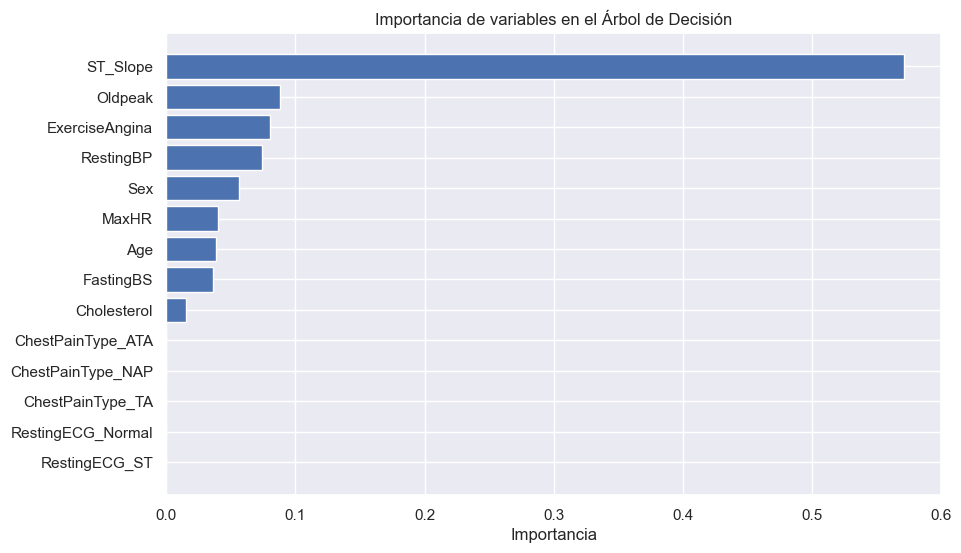

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Importancias de las variables
importances = best_tree.feature_importances_

column_names = data_encoded.drop("HeartDisease", axis=1).columns

# Crear DataFrame ordenado
feat_importances = pd.DataFrame({
    "Variable": column_names,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

print(feat_importances)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(feat_importances["Variable"], feat_importances["Importancia"])
plt.gca().invert_yaxis()  # La más importante arriba
plt.title("Importancia de variables en el Árbol de Decisión")
plt.xlabel("Importancia")
plt.show()


In [153]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

# Predicciones con el mejor modelo
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)

# Métricas para TRAIN
print("== Train ==")
print("Accuracy:           ", accuracy_score(y_train, y_pred_train))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_train, y_pred_train))
print("\nMatriz de Confusión (Train):")
print(confusion_matrix(y_train, y_pred_train))
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_pred_train))

print("\n============================\n")

# Métricas para TEST
print("== Test ==")
print("Accuracy:           ", accuracy_score(y_test, y_pred_test))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_test, y_pred_test))
print("\nMatriz de Confusión (Test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_pred_test))


== Train ==
Accuracy:            0.8813096862210096
Balanced Accuracy:   0.8798404095152063

Matriz de Confusión (Train):
[[284  44]
 [ 43 362]]

Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.89      0.89      0.89       405

    accuracy                           0.88       733
   macro avg       0.88      0.88      0.88       733
weighted avg       0.88      0.88      0.88       733



== Test ==
Accuracy:            0.8043478260869565
Balanced Accuracy:   0.8032042085126734

Matriz de Confusión (Test):
[[65 17]
 [19 83]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        82
           1       0.83      0.81      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80   

In [154]:
# Cargar el modelo entrenado
joblib.dump(best_tree, "../src/models/model.joblib")

# Guardar el encoder
joblib.dump(oh_encoder, "../src/models/onehot_encoder.joblib")


['../src/models/onehot_encoder.joblib']